In [51]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
import requests
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("data/bangkok_traffy.csv")
df.sample(5)

,star,count_reopen
count,274097.000000,787026.000000
mean,3.872801,0.123485
std,1.471863,0.823554
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,100.000000


# Date

In [54]:
finished_df = df[df['state'] == 'เสร็จสิ้น']

In [55]:
filtered_df = finished_df.dropna(axis=0, how='any', subset=['timestamp', 'last_activity'])

In [56]:
def toDate(serie):
    return pd.to_datetime(serie, format='ISO8601').dt.tz_localize(None) + timedelta(hours=7)

filtered_df['timestamp'] = toDate(filtered_df['timestamp'])
filtered_df['last_activity'] = toDate(filtered_df['last_activity'])

filtered_df['duration'] = (filtered_df['last_activity'] - filtered_df['timestamp']).dt.total_seconds() // 60
filtered_df.sample(5)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity,duration
301273,EVNLM2,"{ถนน,สายไฟ}","เขตพระนคร,ฝ่ายโยธา เขตพระนคร,การไฟฟ้านครหลวง เ...",ปัญหา: ประชาชนแจ้งว่ามีสายไฟสีน้ำเงินเหลือง ไม...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.49765,13.76434","110 Thanon Samsen, แขวงวัดสามพระยา เขตพระนคร ก...",วัดสามพระยา,พระนคร,จังหวัดกรุงเทพมหานคร,2023-06-19 19:12:12.345850,เสร็จสิ้น,NaN,0,2023-06-25 06:43:10.213546,7890.0
616428,2YJJTK,"{น้ำท่วม,ถนน}","เขตบางนา,ฝ่ายโยธา เขตบางนา,ศูนย์ควบคุมระบบป้อง...",ปัญหา: เบสท์ ตลอดทั้งซอยดังกล่าว พบน้ำท่วมขัง...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.61818,13.66250",22/1 ซอย ลาซาล 32 บางนาใต้ เขตบางนา กรุงเทพมหา...,บางนาใต้,บางนา,จังหวัดกรุงเทพมหานคร,2024-07-04 11:18:11.798651,เสร็จสิ้น,NaN,0,2024-08-09 10:54:41.698164,51816.0
618601,2024-6FWZ3H,{ความสะอาด},"เขตจตุจักร,ฝ่ายรักษาความสะอาดฯ เขตจตุจักร",หน้าประตูบ้านซอยส่วนบุคคลไม่ใช่กองขยะ,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.54972,13.82544",17/18 ถ. กำแพงเพชร 2 แขวงจตุจักร เขตจตุจักร กร...,จตุจักร,จตุจักร,กรุงเทพมหานคร,2024-07-06 15:57:50.501622,เสร็จสิ้น,4.0,0,2024-07-08 06:22:36.128291,2304.0
368726,BVLTXG,"{แสงสว่าง,ถนน,ความปลอดภัย}","เขตทุ่งครุ,ฝ่ายโยธา เขตทุ่งครุ,การไฟฟ้านครหลวง...",ปัญหา: ไฟส่องทางดับนานแล้วมืดมาก กลางคืนมีคนมา...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.49914,13.64098",736 ถ. ประชาอุทิศ แขวงทุ่งครุ เขตทุ่งครุ กรุงเ...,ทุ่งครุ,ทุ่งครุ,จังหวัดกรุงเทพมหานคร,2023-09-08 17:33:25.085970,เสร็จสิ้น,NaN,0,2023-09-18 14:39:52.870350,14226.0
370776,2023-KMENM8,{ถนน},เขตจอมทอง,ถนนเสียหาย เป็นพื้นที่ส่วนบุคคลแต่ไม่มีการทำอะไร,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.47346,13.68026",2/62 ถ. พระราม ๒ แขวงบางมด เขตจอมทอง กรุงเทพมห...,บางมด,จอมทอง,กรุงเทพมหานคร,2023-09-11 17:40:57.392613,เสร็จสิ้น,1.0,0,2023-09-11 17:55:38.110709,14.0


In [57]:
filtered_df['type'].fillna('{}', inplace=True)
filtered_df['type'].isna().sum()

/tmp/ipykernel_86999/4244501731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['type'].fillna('{}', inplace=True)


np.int64(0)

In [58]:
# Define allowed categories
target_types = {
 '',
 'ป้าย',
 'ความสะอาด',
 'แสงสว่าง',
 'สอบถาม',
 'ร้องเรียน',
 'การเดินทาง',
 'จราจร',
 'ท่อระบายน้ำ',
 'สะพาน',
 'เสียงรบกวน',
 'ต้นไม้',
 'คนจรจัด',
 'คลอง',
 'ถนน',
 'เสนอแนะ',
 'กีดขวาง',
 'สายไฟ',
 'PM2.5',
 'น้ำท่วม',
 'ทางเท้า',
 'สัตว์จรจัด',
 'ความปลอดภัย',
 'ห้องน้ำ',
 'ป้ายจราจร'
}

# Function to convert string to list
def parse_categories(s):
    # Remove curly braces and split
    return s.strip('{}').split(',')

# Parse the string column
filtered_df['type_list'] = filtered_df['type'].apply(parse_categories)

# Create binary flags
for cat in target_types:
    filtered_df[cat] = filtered_df['type_list'].apply(lambda lst: int(cat in lst))

# Create 'Others' column
filtered_df['Others'] = filtered_df['type_list'].apply(
    lambda lst: int(any(c not in target_types for c in lst))
)

# Drop intermediate column if you want
filtered_df.drop(columns='type_list', inplace=True)

filtered_df[['type'] + list(target_types)].sample(5)

,type,,น้ำท่วม,การเดินทาง,เสียงรบกวน,สะพาน,ความสะอาด,ความปลอดภัย,ห้องน้ำ,สายไฟ,...,แสงสว่าง,กีดขวาง,PM2.5,ทางเท้า,ป้าย,สอบถาม,คลอง,ร้องเรียน,จราจร,เสนอแนะ
689321,"{ท่อระบายน้ำ,ถนน}",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
488020,{ถนน},0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
674391,{ร้องเรียน},0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
274427,"{ร้องเรียน,ถนน,เสียงรบกวน,จราจร}",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
199636,"{ถนน,แสงสว่าง}",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [59]:
# Define working hours
start_time = time(9, 30)
end_time = time(15, 30)

def minutes_to_next_working_hour(dt):
    weekday = dt.weekday()  # 0 = Monday, ..., 6 = Sunday
    current_time = dt.time()

    # If it's a weekend or after working hours, find next weekday at 9:30
    if weekday >= 5 or current_time >= end_time:
        # Add days until next weekday (Monday–Friday)
        days_ahead = 1
        while (dt + timedelta(days=days_ahead)).weekday() >= 5:
            days_ahead += 1
        next_working_start = datetime.combine((dt + timedelta(days=days_ahead)).date(), start_time)
        return int((next_working_start - dt).total_seconds() // 60)

    # Before work hours today
    elif current_time < start_time:
        today_start = datetime.combine(dt.date(), start_time)
        return int((today_start - dt).total_seconds() // 60)

    # During working hours
    else:
        return 0

# Apply function to timestamp column
filtered_df['until_working_time'] = filtered_df['timestamp'].apply(minutes_to_next_working_hour)

filtered_df[['timestamp', 'until_working_time']].sample(5)

,timestamp,until_working_time
378242,2023-09-21 00:28:42.722252,541
350350,2023-08-16 19:27:22.619976,842
160488,2022-10-15 12:48:06.802603,2681
85746,2022-07-15 15:15:01.921193,0
118909,2022-08-16 08:48:52.120468,41


# Org's info

In [60]:
limit = 100
org_key = 'bangkok'
url = f'https://publicapi.traffy.in.th/premium-org-fondue/statistic-rank/top-rank-avg-star?org_key={org_key}&limit={limit}'

resp = requests.get(url)
data = resp.json()
orgs = data['results']

pd.DataFrame(orgs).to_csv('data/org.csv')

In [61]:
orgs = pd.read_csv('data/org.csv')
orgs.sample(5)
orgs.drop(columns=['Unnamed: 0'], inplace=True)
# orgs.reset_index(inplace=True)
orgs.set_index('fonduegroup_name', inplace=True)
orgs.sample(5)

,rank,timestamp,fonduegroup_id,post_count_star,post_count_star_stat,avg_star,post_count_all,post_count_finish,post_finish_percentage,avg_duration_minutes_inprogress,avg_duration_minutes_finished
fonduegroup_name,,,,,,,,,,,
เขตราษฎร์บูรณะ,27,NaN,18042,3055,"{'star_1': 434, 'star_2': 128, 'star_3': 274, ...",3.96,8196,6690,81.63,8894,47880
เขตภาษีเจริญ,7,NaN,18038,5911,"{'star_1': 763, 'star_2': 195, 'star_3': 448, ...",4.10,15916,13055,82.02,10438,55880
เขตยานนาวา,21,NaN,18040,5071,"{'star_1': 655, 'star_2': 229, 'star_3': 500, ...",3.98,15646,12540,80.15,16862,95756
เขตทวีวัฒนา,22,NaN,18017,2946,"{'star_1': 403, 'star_2': 149, 'star_3': 234, ...",3.98,9570,7621,79.63,14293,64430
เขตวังทองหลาง,34,NaN,18044,6431,"{'star_1': 969, 'star_2': 291, 'star_3': 591, ...",3.91,17481,14816,84.75,12473,70329


In [62]:
# Define target columns
target_cols = ['avg_star', 'post_finish_percentage', 'avg_duration_minutes_finished']

# Convert organization string to list
filtered_df['orgs_list'] = filtered_df['organization'].str.strip().str.split(',')

# Create filtered_df with NaNs in target columns
filtered_df[target_cols] = np.nan

# Explode orgs_list to merge with orgs
exploded = filtered_df[['orgs_list']].explode('orgs_list').reset_index()
exploded['orgs_list'] = exploded['orgs_list'].str.strip()

# Join with orgs DataFrame
merged = exploded.merge(orgs[target_cols], left_on='orgs_list', right_index=True, how='left')

# Aggregate mean values for each original row
means = merged.groupby('index')[target_cols].mean()

# Assign the means back to filtered_df
filtered_df.loc[means.index, target_cols] = means

# Result
filtered_df[['orgs_list'] + target_cols]

filtered_df.drop(columns=['orgs_list'], inplace=True)


In [63]:
filtered_df.columns

Index(['ticket_id', 'type', 'organization', 'comment', 'photo', 'photo_after',
       'coords', 'address', 'subdistrict', 'district', 'province', 'timestamp',
       'state', 'star', 'count_reopen', 'last_activity', 'duration', '',
       'น้ำท่วม', 'การเดินทาง', 'เสียงรบกวน', 'สะพาน', 'ความสะอาด',
       'ความปลอดภัย', 'ห้องน้ำ', 'สายไฟ', 'คนจรจัด', 'ถนน', 'ป้ายจราจร',
       'ท่อระบายน้ำ', 'สัตว์จรจัด', 'ต้นไม้', 'แสงสว่าง', 'กีดขวาง', 'PM2.5',
       'ทางเท้า', 'ป้าย', 'สอบถาม', 'คลอง', 'ร้องเรียน', 'จราจร', 'เสนอแนะ',
       'Others', 'until_working_time', 'avg_star', 'post_finish_percentage',
       'avg_duration_minutes_finished'],
      dtype='object')

In [64]:
def plot_bin(s, bins = 100):
    s.plot(kind='hist', bins=bins, edgecolor='black')

    # Add labels and title
    plt.xlabel('duration (minutes)')
    plt.ylabel('Frequency')

    # Show plot
    plt.show()

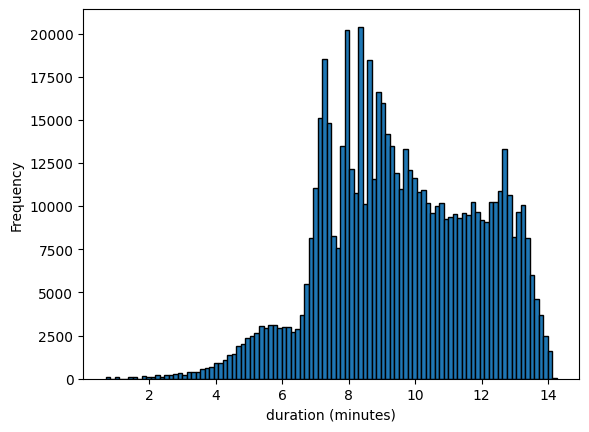

In [65]:
filtered_df = filtered_df[filtered_df['duration'] > 0]

filtered_df['log_duration'] = filtered_df['duration'].apply(np.log1p) 

plot_bin(filtered_df['log_duration'])

In [66]:
# # Assuming `s` is your Pandas Series
# s = filtered_df['log_duration']
# Q1 = s.quantile(0.25)
# Q3 = s.quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
# filtered_df = filtered_df[(s >= lower_bound) & (s <= upper_bound)]

# s_filtered = filtered_df['log_duration']

# plot_bin(s_filtered)

## Cut outlier

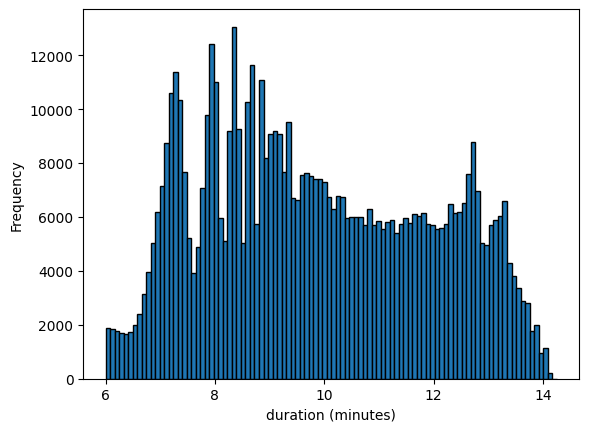

In [72]:
lower_bound = 6
upper_bound = 20

log_duration = filtered_df['log_duration']
filtered_df = filtered_df[(log_duration >= lower_bound) & (log_duration <= upper_bound)]

plot_bin(filtered_df['log_duration'])

In [73]:
types = [
 'ป้าย',
 'ความสะอาด',
 'แสงสว่าง',
 'สอบถาม',
 'ร้องเรียน',
 'การเดินทาง',
 'จราจร',
 'ท่อระบายน้ำ',
 'สะพาน',
 'เสียงรบกวน',
 'ต้นไม้',
 'คนจรจัด',
 'คลอง',
 'ถนน',
 'เสนอแนะ',
 'กีดขวาง',
 'สายไฟ',
 'PM2.5',
 'น้ำท่วม',
 'ทางเท้า',
 'สัตว์จรจัด',
 'ความปลอดภัย',
 'ห้องน้ำ',
 'ป้ายจราจร',
 'Others'
]

feature_cols = [
    'until_working_time',
    'avg_star',
    'post_finish_percentage',
    'avg_duration_minutes_finished',
]

target_cols = [
    'duration',
    'log_duration',
]

cols = target_cols + feature_cols + types

filtered_df = filtered_df[cols]
filtered_df

,duration,log_duration,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
0,394723.0,12.885942,3698,4.08,84.940,85415.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,395605.0,12.888174,693,3.82,84.320,76399.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,364093.0,12.805167,1286,3.86,84.510,54852.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,473630.0,13.068184,944,4.08,84.940,85415.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,353929.0,12.776854,840,4.09,85.420,50067.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786715,701.0,6.553933,780,3.88,77.790,94129.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
786740,781.0,6.661855,753,3.93,80.690,80904.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786788,720.0,6.580639,692,3.93,80.690,80904.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786844,533.0,6.280396,548,3.88,82.450,75281.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
na_cols = ['avg_star', 'post_finish_percentage', 'avg_duration_minutes_finished']

filtered_df[na_cols] = filtered_df[na_cols].fillna(filtered_df[na_cols].mean())

In [75]:
filtered_df.isna().sum()

duration                         0
log_duration                     0
until_working_time               0
avg_star                         0
post_finish_percentage           0
avg_duration_minutes_finished    0
ป้าย                             0
ความสะอาด                        0
แสงสว่าง                         0
สอบถาม                           0
ร้องเรียน                        0
การเดินทาง                       0
จราจร                            0
ท่อระบายน้ำ                      0
สะพาน                            0
เสียงรบกวน                       0
ต้นไม้                           0
คนจรจัด                          0
คลอง                             0
ถนน                              0
เสนอแนะ                          0
กีดขวาง                          0
สายไฟ                            0
PM2.5                            0
น้ำท่วม                          0
ทางเท้า                          0
สัตว์จรจัด                       0
ความปลอดภัย                      0
ห้องน้ำ             

In [76]:
display(filtered_df)
filtered_df.to_csv('data/clean.csv', index=False)

,duration,log_duration,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
0,394723.0,12.885942,3698,4.08,84.940,85415.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,395605.0,12.888174,693,3.82,84.320,76399.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,364093.0,12.805167,1286,3.86,84.510,54852.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,473630.0,13.068184,944,4.08,84.940,85415.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,353929.0,12.776854,840,4.09,85.420,50067.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786715,701.0,6.553933,780,3.88,77.790,94129.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
786740,781.0,6.661855,753,3.93,80.690,80904.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786788,720.0,6.580639,692,3.93,80.690,80904.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786844,533.0,6.280396,548,3.88,82.450,75281.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
